<a href="https://colab.research.google.com/github/IvyArtz/RepositorioGithub/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [4]:
Faturamento_por_loja = []

lista_de_lojas = [loja, loja2, loja3, loja4]

for i, loja_df in enumerate(lista_de_lojas, start=1):
    faturamento_total = loja_df['Preço'].sum()
    total_formatado = f"Loja {i}: R$ {faturamento_total:,.2f}"
    Faturamento_por_loja.append(total_formatado)

print(Faturamento_por_loja)

['Loja 1: R$ 1,534,509.12', 'Loja 2: R$ 1,488,459.06', 'Loja 3: R$ 1,464,025.03', 'Loja 4: R$ 1,384,497.58']


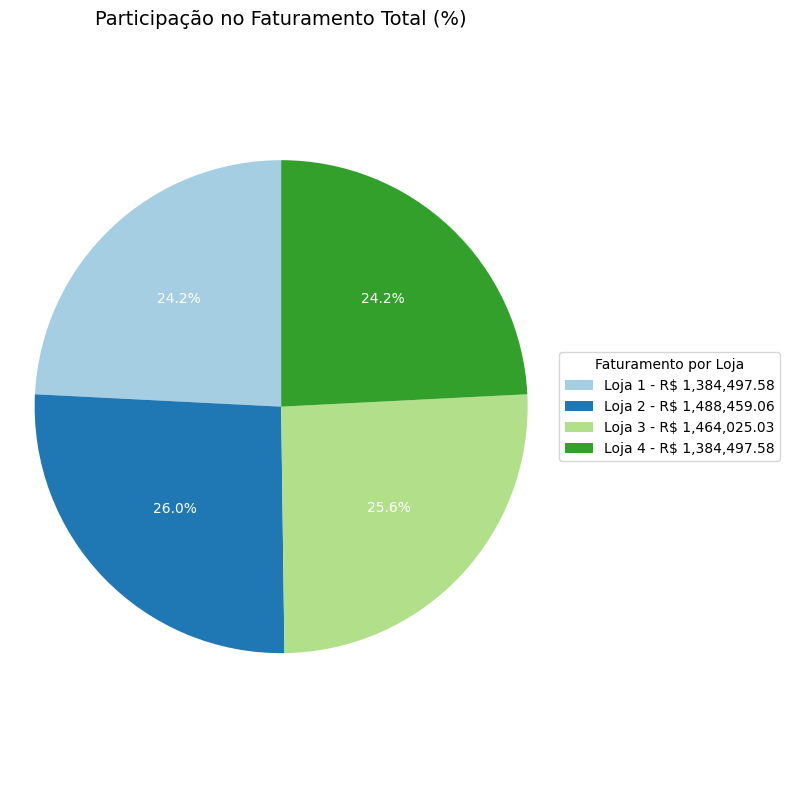

In [12]:
import matplotlib.pyplot as plt

# Lista com os DataFrames de cada loja
lista_de_lojas = [loja, loja2, loja3, loja4]

# Armazenando valores de faturamento e nomes das lojas
valores_faturamento = []
legenda_formatada = []

for i, loja_df in enumerate(lista_de_lojas, start=1):
    faturamento_total = loja_df['Preço'].sum()
    valores_faturamento.append(faturamento_total)
    legenda_formatada.append(f'Loja {i} - R$ {faturamento_total:,.2f}')

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    valores_faturamento,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    textprops=dict(color="white", fontsize=10)
)

# Adiciona a legenda com os valores em R$
plt.legend(wedges, legenda_formatada, title="Faturamento por Loja", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Participação no Faturamento Total (%)', fontsize=14)
plt.axis('equal')  # Deixa a pizza redondinha
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [13]:
# Função para calcular e ordenar as categorias por quantidade
def ordenar_categorias_por_quantidade(loja_df, numero_loja):
    quantidade = loja_df['Categoria do Produto'].value_counts()
    quantidade_dict = quantidade.to_dict()
    ordenado = sorted(quantidade_dict.items(), key=lambda x: x[1], reverse=True)
    print(f"\nLoja {numero_loja} - Categorias mais vendidas:")
    print(ordenado)

# Lista com os DataFrames das lojas
lista_lojas = [loja, loja2, loja3, loja4]

# Loop para aplicar a função em cada loja
for i, loja_df in enumerate(lista_lojas, start=1):
    ordenar_categorias_por_quantidade(loja_df, i)


Loja 1 - Categorias mais vendidas:
[('moveis', 480), ('eletronicos', 451), ('brinquedos', 338), ('esporte e lazer', 277), ('eletrodomesticos', 254), ('utilidades domesticas', 201), ('livros', 187), ('instrumentos musicais', 170)]

Loja 2 - Categorias mais vendidas:
[('moveis', 442), ('eletronicos', 422), ('brinquedos', 313), ('eletrodomesticos', 305), ('esporte e lazer', 275), ('instrumentos musicais', 224), ('livros', 197), ('utilidades domesticas', 181)]

Loja 3 - Categorias mais vendidas:
[('moveis', 499), ('eletronicos', 451), ('brinquedos', 315), ('eletrodomesticos', 278), ('esporte e lazer', 277), ('livros', 185), ('instrumentos musicais', 177), ('utilidades domesticas', 177)]

Loja 4 - Categorias mais vendidas:
[('moveis', 480), ('eletronicos', 451), ('brinquedos', 338), ('esporte e lazer', 277), ('eletrodomesticos', 254), ('utilidades domesticas', 201), ('livros', 187), ('instrumentos musicais', 170)]


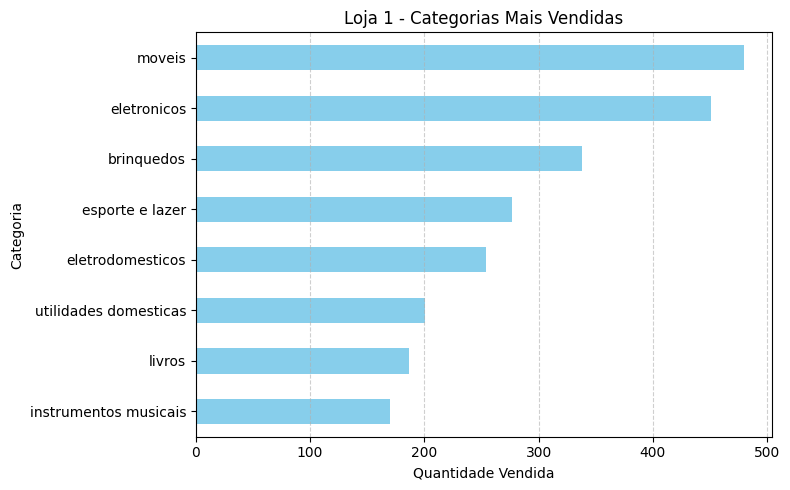

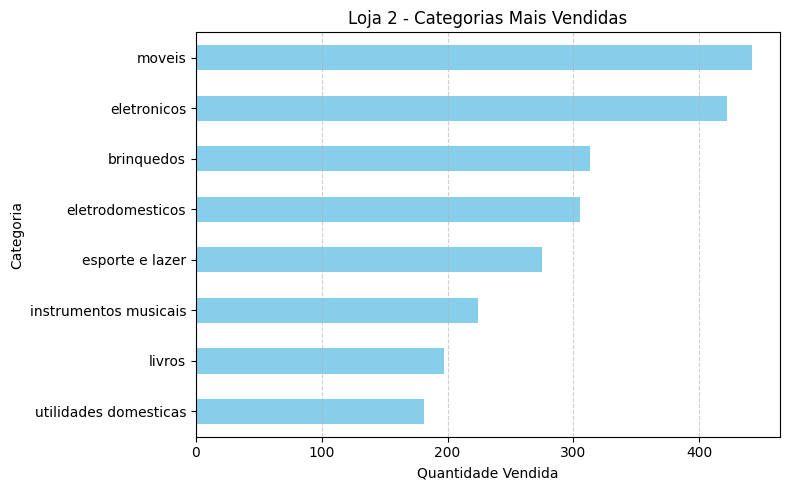

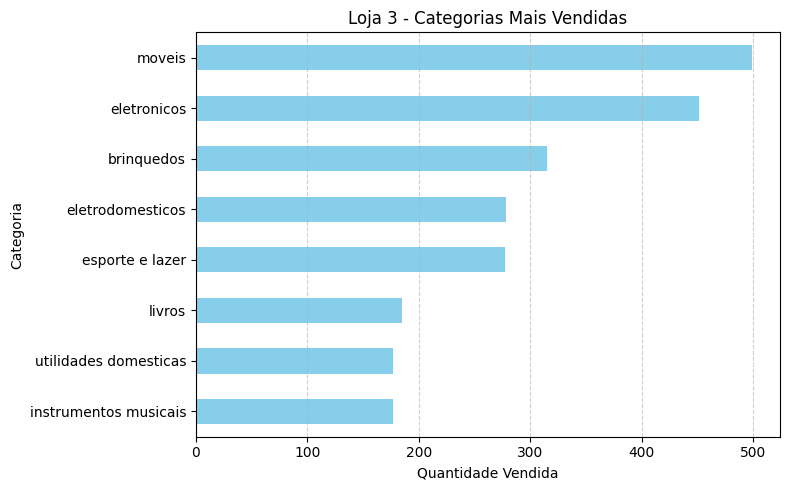

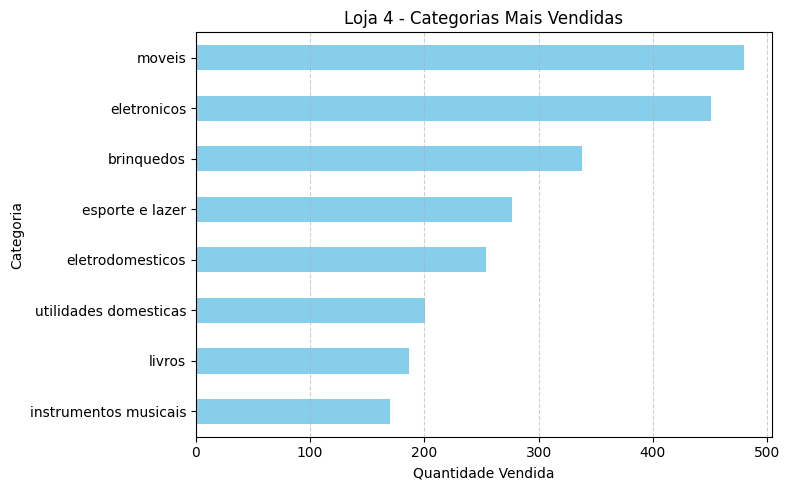

In [14]:
import matplotlib.pyplot as plt

# Função para plotar gráfico de barras horizontais de categorias por loja
def plotar_categorias(loja_df, numero_loja):
    quantidade = loja_df['Categoria do Produto'].value_counts()

    plt.figure(figsize=(8, 5))
    quantidade.sort_values().plot(kind='barh', color='skyblue')  # .sort_values() pra deixar da menor pra maior
    plt.title(f'Loja {numero_loja} - Categorias Mais Vendidas')
    plt.xlabel('Quantidade Vendida')
    plt.ylabel('Categoria')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Lista com os DataFrames das lojas
lista_lojas = [loja, loja2, loja3, loja4]

# Loop para gerar um gráfico para cada loja
for i, loja_df in enumerate(lista_lojas, start=1):
    plotar_categorias(loja_df, i)

# 3. Média de Avaliação das Lojas

In [6]:
lojas = [loja, loja2, loja3, loja4,]


for i, loja_df in enumerate(lojas, start=1):
    media = loja_df['Avaliação da compra'].mean()
    print(f'Loja {i} - Média de Avaliação: {media:.2f}')



Loja 1 - Média de Avaliação: 3.98
Loja 2 - Média de Avaliação: 4.04
Loja 3 - Média de Avaliação: 4.05
Loja 4 - Média de Avaliação: 4.00


# 4. Produtos Mais e Menos Vendidos

In [9]:
lojas = [loja, loja2, loja3, loja4]

for i, loja in enumerate(lojas, start=1):
    print(f"\nLoja {i}:")

    contagem = loja['Categoria do Produto'].value_counts()

    if not contagem.empty:
        mais_vendido = contagem.idxmax()
        mais_vendido_qtd = contagem.max()

        menos_vendido = contagem.idxmin()
        menos_vendido_qtd = contagem.min()

        print(f"Produto mais vendido: {mais_vendido} (Quantidade: {mais_vendido_qtd})")
        print(f"Produto menos vendido: {menos_vendido} (Quantidade: {menos_vendido_qtd})")
    else:
        print("Sem dados para esta loja.")


Loja 1:
Produto mais vendido: moveis (Quantidade: 465)
Produto menos vendido: utilidades domesticas (Quantidade: 171)

Loja 2:
Produto mais vendido: moveis (Quantidade: 442)
Produto menos vendido: utilidades domesticas (Quantidade: 181)

Loja 3:
Produto mais vendido: moveis (Quantidade: 499)
Produto menos vendido: instrumentos musicais (Quantidade: 177)

Loja 4:
Produto mais vendido: moveis (Quantidade: 480)
Produto menos vendido: instrumentos musicais (Quantidade: 170)


# 5. Frete Médio por Loja


In [10]:
lojas = [loja, loja2, loja3, loja4,]


for i, loja_df in enumerate(lojas, start=1):
    media = loja_df['Frete'].mean()
    print(f'Loja {i} - Média de Frete: {media:.2f}')


Loja 1 - Média de Frete: 31.28
Loja 2 - Média de Frete: 33.62
Loja 3 - Média de Frete: 33.07
Loja 4 - Média de Frete: 31.28


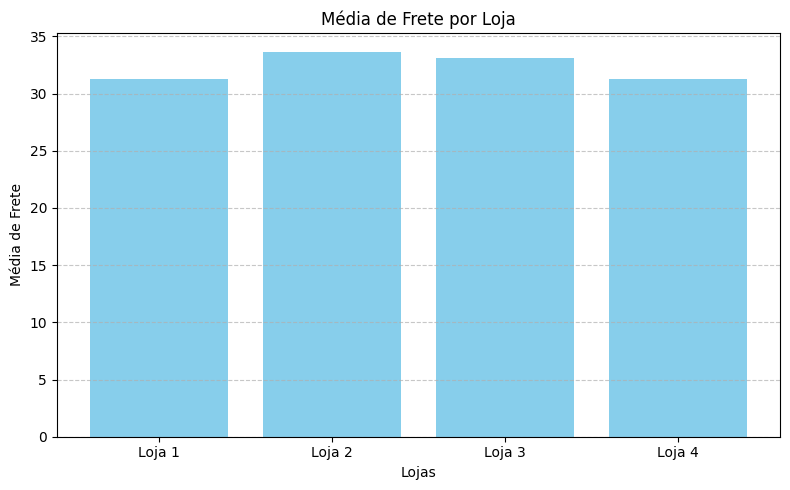

In [11]:
import matplotlib.pyplot as plt

# Lista de médias
medias_frete = [loja_df['Frete'].mean() for loja_df in lojas]

# Nomes das lojas (opcional, personalizável)
nomes_lojas = [f'Loja {i}' for i in range(1, len(lojas) + 1)]

# Plotando o gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(nomes_lojas, medias_frete, color='skyblue')
plt.title('Média de Frete por Loja')
plt.xlabel('Lojas')
plt.ylabel('Média de Frete')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()